## Logistic Regression

- Trying out logistic regression on a simple 2D dataset as illustrated in the Real Python blog
- In this example, I'm going to use a simple sigmoid function that is offset by a few x units from the origin
- The goal of this model is to predict if the y axis is positive, indicated by '1' or if the y axis coordinate is negative,
  indicated by a '0'.

## Forming the Sigmoid Sample Function

- Using numpy, let us first construct a sigmoid function which has a center at x=3 on the x axis and follows a curve on the y axis

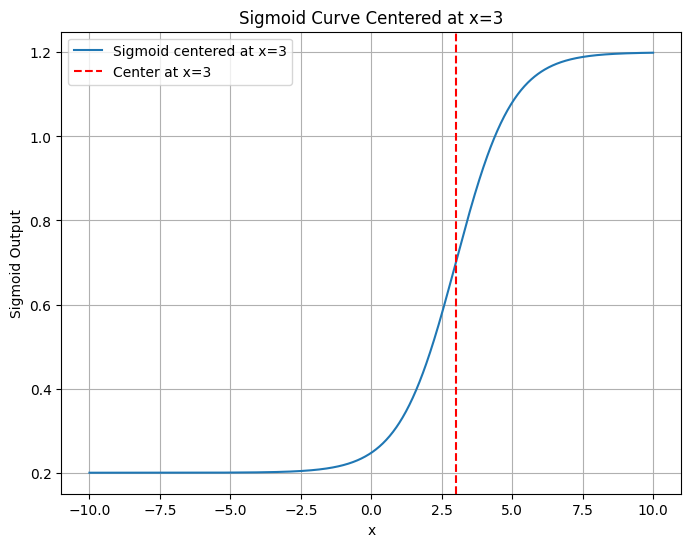

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_centered_at_3(x):
  return 1 / (1 + np.exp(-(x - 3)))

# Example usage:
x_values = np.linspace(-10, 10, 1000) # Generate x values from -10 to 10
y_values = sigmoid_centered_at_3(x_values) + 0.2

# Plotting the curve to visualize
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid centered at x=3')
plt.axvline(x=3, color='r', linestyle='--', label='Center at x=3')
plt.title('Sigmoid Curve Centered at x=3')
plt.xlabel('x')
plt.ylabel('Sigmoid Output')
plt.grid(True)
plt.legend()
plt.show()

## Fitting the Machine Learning model

- We would like to classify all y coordinates above the value 1.0 as '1' using the classifier and all y co-ords below 1.0 as '0'
- A simple Logistic Regression Classifer (Binary Classifier) would be sufficient for this task
- Using the TensorFlow library for logistic regression, we'll import the following functions
- Keras Sequential, with a sigmoid activation function

2025-07-13 18:11:50.353463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752419510.369526  325875 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752419510.374387  325875 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752419510.389741  325875 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752419510.389775  325875 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752419510.389780  325875 computation_placer.cc:177] computation placer alr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/job:localhost/replica:0/task:0/device:GPU:0
xtrain:  [ -9.41941942   0.71071071   3.91391391   1.15115115   6.73673674
   1.93193193  -6.6966967    8.37837838  -0.09009009   6.4964965
  -8.6986987   -7.17717718   8.51851852   6.55655656   3.11311311
  -3.37337337   3.29329329  -5.01501502   8.15815816   4.17417417
  -3.89389389   4.69469469   9.51951952  -9.01901902   7.93793794
  -9.95995996   0.89089089  -2.99299299   8.0980981    0.73073073
  -3.11311311   9.8998999   -0.37037037   1.51151151  -9.33933934
  -9.37937938  -5.37537538   9.27927928  -6.15615616  -3.33333333
  -9.93993994  -5.91591592   0.29029029   5.995996    -3.87387387
  -7.81781782  -1.39139139  -8.45845846  -8.31831832  -4.27427427
  -8.35835836   9.83983984   5.7957958    7.8978979   -2.03203203
  -3.53353353   0.39039039   8.33833834   8.45845846  -9.8998999
   4.63463463  -0.69069069  -8.05805806  -4.67467467  -2.85285285
   7.37737738   5.97597

I0000 00:00:1752419514.435287  325875 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

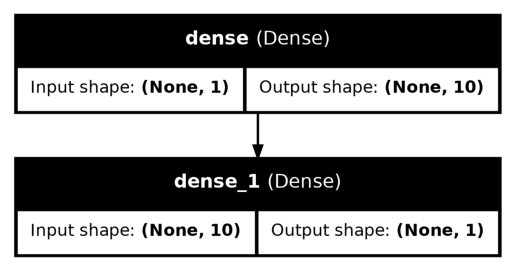

Epoch 1/50


I0000 00:00:1752419515.614331  325952 service.cc:152] XLA service 0x74e41c006790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752419515.614369  325952 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-07-13 18:11:55.627686: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752419515.660542  325952 cuda_dnn.cc:529] Loaded cuDNN version 90300


17/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5256   

I0000 00:00:1752419515.876355  325952 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.5110 - val_accuracy: 0.0000e+00 - val_loss: 0.3232
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.4075 - val_accuracy: 0.0000e+00 - val_loss: 0.2720
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.3380 - val_accuracy: 0.0000e+00 - val_loss: 0.1968
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.2271 - val_accuracy: 0.0000e+00 - val_loss: 0.1037
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.1159 - val_accuracy: 0.0000e+00 - val_loss: 0.0629
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0700 - val_accuracy: 0.0000e+00 - val_loss: 0.0482
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0520 - val_accuracy: 0.0000e+00 - val_loss: 0.0414
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00

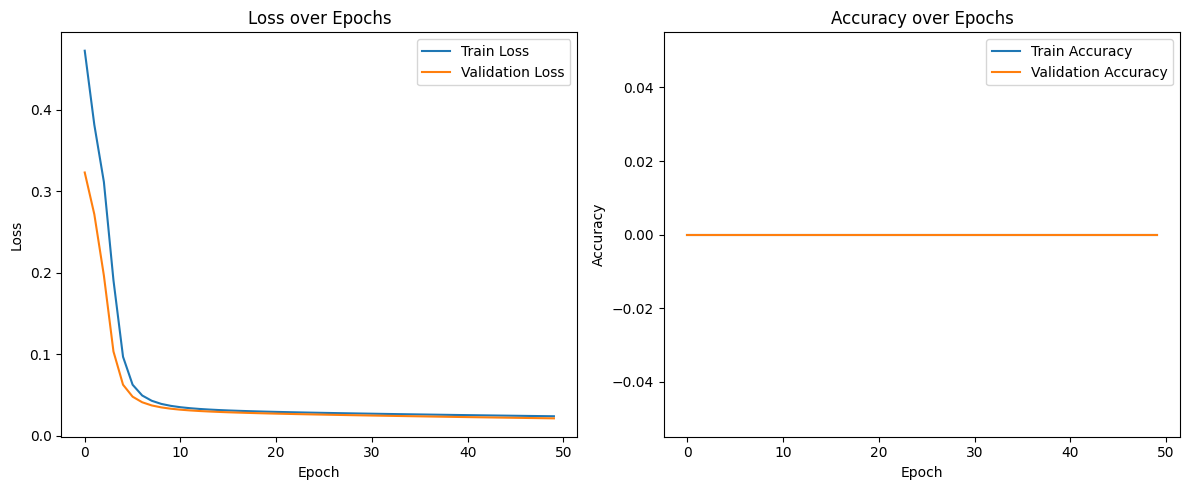

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Test the GPU
print(tf.config.list_physical_devices('GPU'))
print(tf.add(tf.constant([1.0, 2.0]), tf.constant([3.0, 4.0])).device)

# Import Keras
from tensorflow import keras

def sigmoid_centered_at_3(x):
  return 1 / (1 + np.exp(-(x - 3)))

# Example usage:
X = np.linspace(-10, 10, 1000) # Generate x values from -10 to 10
y = sigmoid_centered_at_3(X) + 0.2

# 1. Generate the test/train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("xtrain: ", X_train, len(X_train))
print("xtest: ", X_test, len(X_test))
print("ytrain: ", y_train, len(y_train))
print("ytest: ", y_test, len(y_test))

print("xtrain shape: ", X_train.shape)

# 2. Construct the LR model
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 3. Compile with metrics accuracy, only then will the evaluate function generate
# a test loss, test accuracy tuple, otherwise it will only return the loss
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])


# model = keras.Sequential([
#     keras.layers.Dense(1, activation='sigmoid', input_shape=(1,))
# ])

# # 3. Compile the model
# # For binary classification, we use 'binary_crossentropy' as the loss function
# # and 'accuracy' as a metric.
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

model.summary()

# 4. Visualize the model
# Plot the model
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


img = mpimg.imread('model.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# 4. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# 5. Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 6. Make predictions
predictions = model.predict(X_test)

for x, y, pred in zip(X_test, y_test, predictions):
    print(f"X: {x} y: {y} Prediction: {pred}")

# Convert probabilities to binary class labels (0 or 1)
# The confidence value indicates the probability of the prediction being labeled as a '1'
confidence = 0.70
predicted_classes = (predictions > confidence).astype(int)

print("\nSample predictions vs. actual labels:")
for i in range(10):
    print(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")


# 7. Visualize training history (optional)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# Training set visualization

- Plot the training set with the specified X and Y values, to get an idea of what the data looks like
- See how the logistic regression model can be used to classify or differentiate the data, since all the data points
  fall either ABOVE y=3 or BELOW y=3, so this problem fits under binary classification, using a logistic regression model



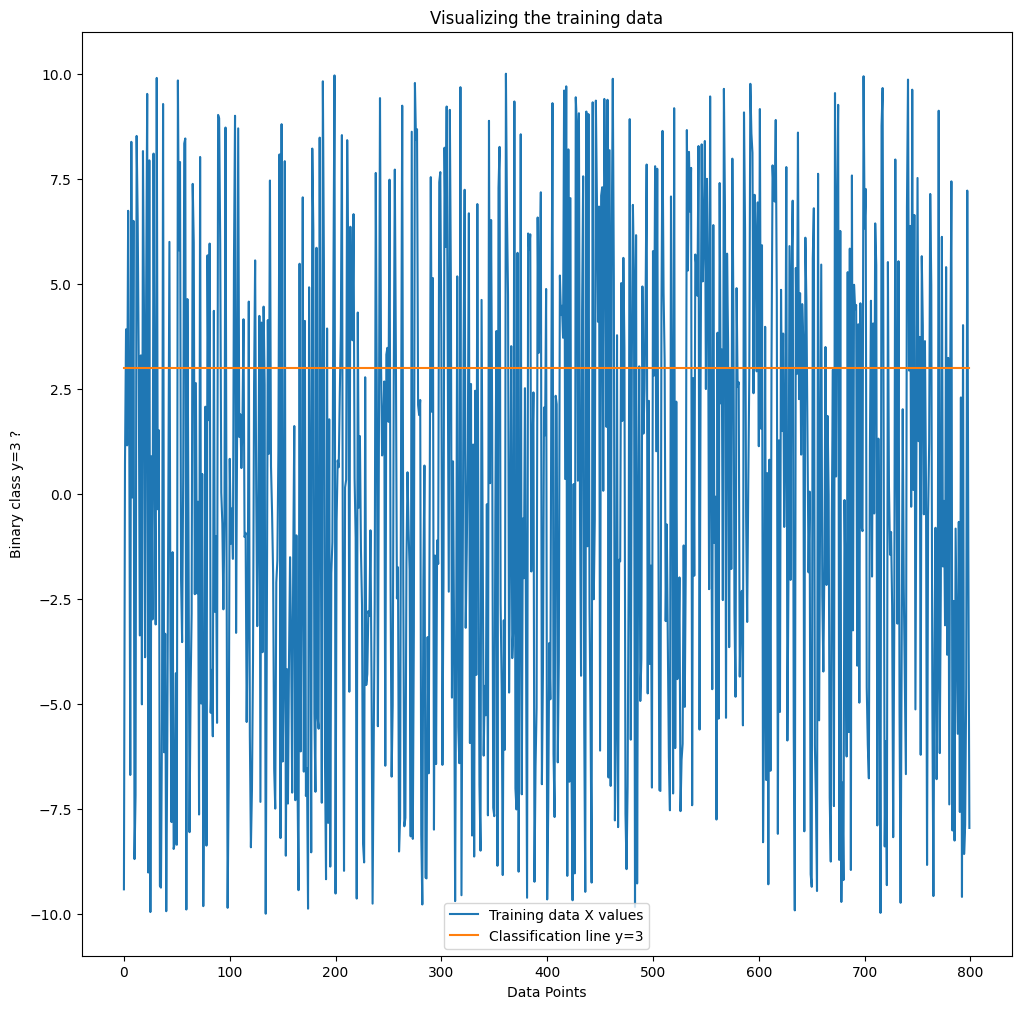

In [13]:

y_line = np.dot(3, np.ones(shape=(X_train.shape[0], 1)))

plt.figure(figsize=(12, 12))

plt.plot(X_train, label='Training data X values')
plt.plot(y_line, label='Classification line y=3')

plt.title('Visualizing the training data')
plt.xlabel('Data Points')
plt.ylabel('Binary class y=3 ?')
plt.legend()

plt.show()

## Visualizing Accuracy: Plotting the Dataset after classification

- Plot after classification, where we visualize the X_test points, then we show the predicted values
- Next, we can see the actual values of y for the corresponding X_test points
- This should give us a visual idea of how accurate the predictions were compared to the actual y values for the data


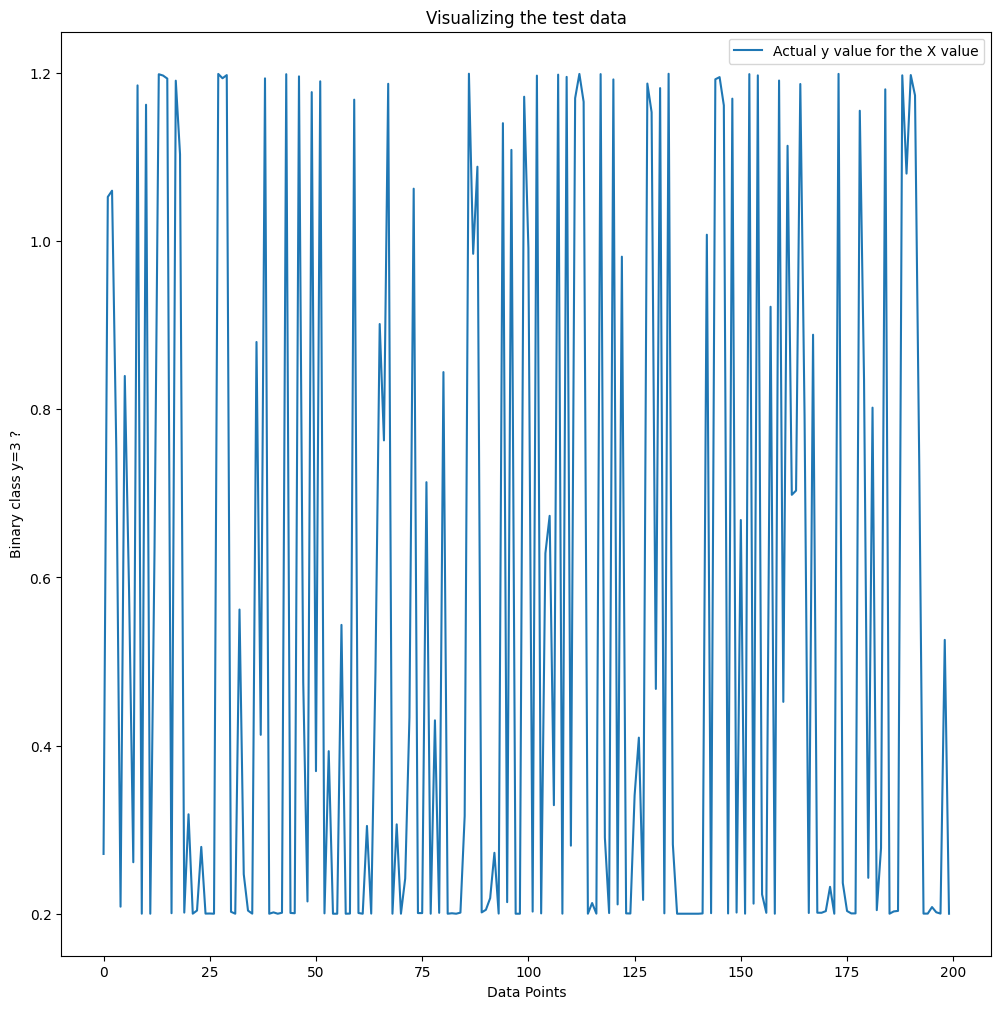

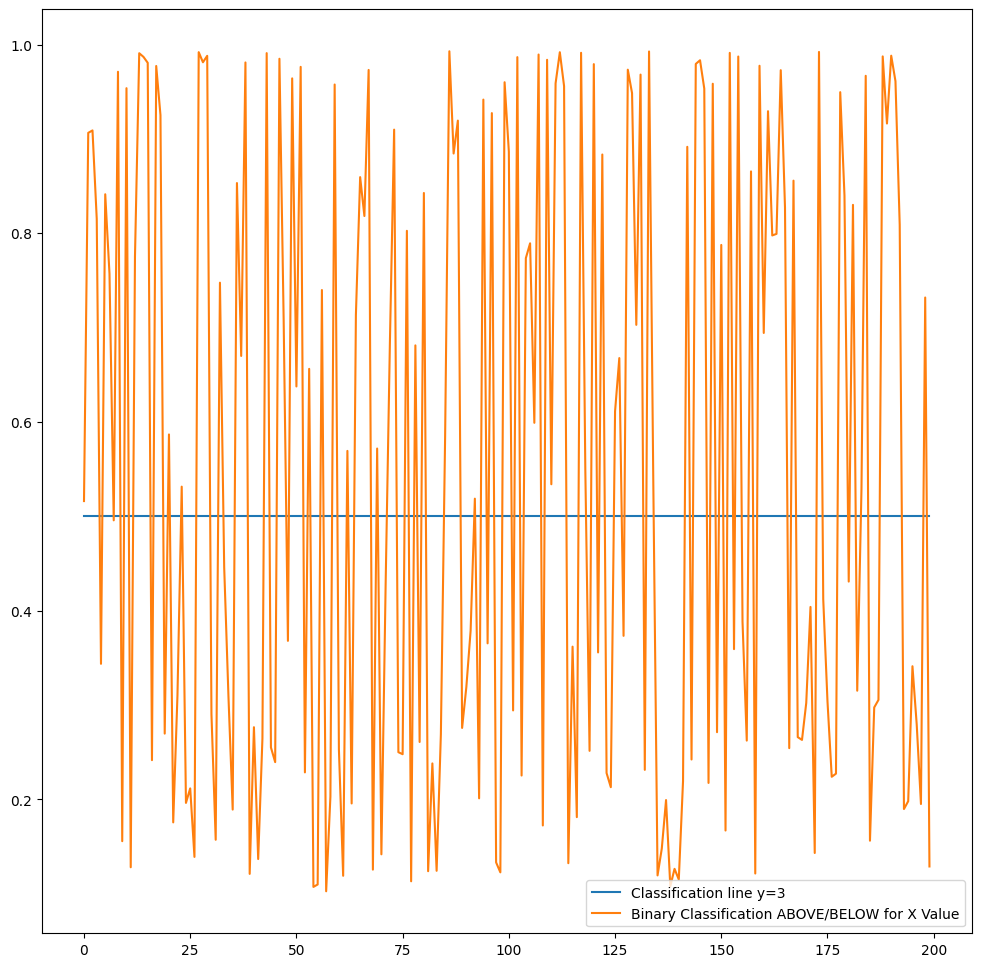

In [12]:
y_line = np.dot(0.5, np.ones(shape=(predictions.shape[0], 1)))

plt.figure(figsize=(12, 12))

plt.plot(y_test, label='Actual y value for the X value')

plt.title('Visualizing the test data')
plt.xlabel('Data Points')
plt.ylabel('Binary class y=3 ?')
plt.legend()


plt.figure(figsize=(12, 12))
plt.plot(y_line, label='Classification line y=3')
plt.plot(predictions, label='Binary Classification ABOVE/BELOW for X Value')
plt.legend()


plt.show()
